In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import geopandas as gpd
import pandas as pd

In [38]:
data = gpd.read_file("Shapefile/Accidents_with_Dual_Dist.shp")
data.head()

,OBJECTID,OBJECTID_1,Cod_Uniq_F,Cod_Uniq,Name_Hoze,Cod_Hoze,Name_Mehva,Y,X,Band_Raft_,...,Mahdode_Ab,Mahdode_Ma,Mahdode_Sh,Onvan_File,X_,Y_,ID,Distance,Dual_Dista,geometry
0,149,0.0,None,None,None,None,None,0.0,0.0,None,...,0.0,0.0,0.0,None,562061.4358,4.005229e+06,-1.0,0.000000,0.0,POINT (562061.436 4005229.099)
1,150,0.0,None,None,None,None,None,0.0,0.0,None,...,0.0,0.0,0.0,None,562056.1959,4.005130e+06,-1.0,99.412989,0.0,POINT (562056.196 4005129.824)
2,151,0.0,None,None,None,None,None,0.0,0.0,None,...,0.0,0.0,0.0,None,562073.1524,4.005031e+06,-1.0,99.846558,0.0,POINT (562073.152 4005031.428)
3,152,0.0,None,None,None,None,None,0.0,0.0,None,...,0.0,0.0,0.0,None,562106.7657,4.004937e+06,-1.0,99.851346,0.0,POINT (562106.766 4004937.404)
4,153,0.0,None,None,None,None,None,0.0,0.0,None,...,0.0,0.0,0.0,None,562139.5274,4.004843e+06,-1.0,99.979818,0.0,POINT (562139.527 4004842.944)


In [39]:
Acc_data = data[data["ID"] != -1]
Acc_data.head()

,OBJECTID,OBJECTID_1,Cod_Uniq_F,Cod_Uniq,Name_Hoze,Cod_Hoze,Name_Mehva,Y,X,Band_Raft_,...,Mahdode_Ab,Mahdode_Ma,Mahdode_Sh,Onvan_File,X_,Y_,ID,Distance,Dual_Dista,geometry
12,148,19441.0,M12-3R,M12-406B,حوزه سبزوار,None,سبزوار-بردسكن,4.004186e+06,562530.3841,بردسكن-سبزوار,...,0.0,0.0,1.0,سبزوار,562530.3841,4.004186e+06,1.0,65.816968,0.000000,POINT (562530.384 4004186.076)
17,17,2949.0,None,M12-5R,حوزه سبزوار,None,سبزوار-بردسكن,4.003849e+06,562684.6853,سبزوار-بردسكن,...,1.0,0.0,1.0,None,562684.6853,4.003849e+06,2.0,40.852908,375.292765,POINT (562684.685 4003848.858)
20,71,10301.0,None,M12-404B,حوزه سبزوار,None,سبزوار-بردسكن,4.003634e+06,562715.9041,بردسكن-سبزوار,...,0.0,0.0,1.0,None,562715.9041,4.003634e+06,3.0,58.634003,217.787079,POINT (562715.904 4003634.152)
31,7,2170.0,None,M12-9R,حوزه سبزوار,None,سبزوار-بردسكن,4.002828e+06,562946.3556,سبزوار-بردسكن,...,1.0,0.0,1.0,None,562946.3556,4.002828e+06,4.0,24.762633,967.719574,POINT (562946.356 4002827.756)
33,101,15608.0,None,M12-400B,حوزه سبزوار,None,سبزوار-بردسكن,4.002734e+06,563040.1760,بردسكن-سبزوار,...,0.0,0.0,1.0,None,563062.4010,4.002767e+06,5.0,55.812578,131.195831,POINT (563062.401 4002766.730)


In [40]:
X = Acc_data.geometry.apply(lambda coordinate: list(coordinate.coords[0]))
X = np.array(X.tolist())
X

array([[ 562530.3841, 4004186.0758],
       [ 562684.6853, 4003848.8579],
       [ 562715.9041, 4003634.1523],
       [ 562946.3556, 4002827.7558],
       [ 563062.401 , 4002766.7305],
       [ 563882.0369, 4002348.5041],
       [ 564233.7286, 4001680.7255],
       [ 565331.2788, 4000128.8828],
       [ 565759.1708, 3999694.4768],
       [ 565843.1046, 3999588.4867],
       [ 565970.94  , 3999402.08  ],
       [ 566295.9536, 3998946.0816],
       [ 566359.2577, 3998856.7717],
       [ 566625.6318, 3998521.2133],
       [ 566723.5796, 3998395.3193],
       [ 567241.6349, 3997795.0471],
       [ 567310.6079, 3997700.674 ],
       [ 567401.1899, 3997592.2941],
       [ 567419.2857, 3997579.8003],
       [ 567458.6818, 3997528.3384],
       [ 567593.8788, 3997373.1608],
       [ 567732.4282, 3997205.378 ],
       [ 567929.4962, 3996971.8037],
       [ 568144.1997, 3996722.3484],
       [ 571024.9928, 3994232.8702],
       [ 571359.1067, 3994006.2313],
       [ 571598.6538, 3993748.2425],
 

In [41]:
Clusterer_200 = DBSCAN(eps=200, min_samples=3)
Clusterer_200.fit(X)
Acc_data_lables = pd.Series(Clusterer_200.labels_, index=Acc_data.index, name="Labels_200")

In [42]:
Acc_data = Acc_data.merge(Acc_data_lables, left_index=True, right_index=True)
Acc_data.head()

,OBJECTID,OBJECTID_1,Cod_Uniq_F,Cod_Uniq,Name_Hoze,Cod_Hoze,Name_Mehva,Y,X,Band_Raft_,...,Mahdode_Ma,Mahdode_Sh,Onvan_File,X_,Y_,ID,Distance,Dual_Dista,geometry,Labels_200
12,148,19441.0,M12-3R,M12-406B,حوزه سبزوار,None,سبزوار-بردسكن,4.004186e+06,562530.3841,بردسكن-سبزوار,...,0.0,1.0,سبزوار,562530.3841,4.004186e+06,1.0,65.816968,0.000000,POINT (562530.384 4004186.076),-1
17,17,2949.0,None,M12-5R,حوزه سبزوار,None,سبزوار-بردسكن,4.003849e+06,562684.6853,سبزوار-بردسكن,...,0.0,1.0,None,562684.6853,4.003849e+06,2.0,40.852908,375.292765,POINT (562684.685 4003848.858),-1
20,71,10301.0,None,M12-404B,حوزه سبزوار,None,سبزوار-بردسكن,4.003634e+06,562715.9041,بردسكن-سبزوار,...,0.0,1.0,None,562715.9041,4.003634e+06,3.0,58.634003,217.787079,POINT (562715.904 4003634.152),-1
31,7,2170.0,None,M12-9R,حوزه سبزوار,None,سبزوار-بردسكن,4.002828e+06,562946.3556,سبزوار-بردسكن,...,0.0,1.0,None,562946.3556,4.002828e+06,4.0,24.762633,967.719574,POINT (562946.356 4002827.756),-1
33,101,15608.0,None,M12-400B,حوزه سبزوار,None,سبزوار-بردسكن,4.002734e+06,563040.1760,بردسكن-سبزوار,...,0.0,1.0,None,563062.4010,4.002767e+06,5.0,55.812578,131.195831,POINT (563062.401 4002766.730),-1


In [43]:
Clusters_counts = len(set(Acc_data_lables))
print('Number of clusters: {}'.format(Clusters_counts))

Number of clusters: 9


In [44]:
Clusterer_200.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,
        0,  0,  0, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  2,  2,  2,  2, -1, -1,  3,  3,  3, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  4,  4,  4,  4, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5,  5,  5, -1, -1,
       -1, -1, -1, -1, -1,  6,  6,  6, -1, -1, -1, -1, -1,  7,  7,  7, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [45]:
Clusterer_200.components_

array([[ 567310.6079, 3997700.674 ],
       [ 567401.1899, 3997592.2941],
       [ 567419.2857, 3997579.8003],
       [ 567458.6818, 3997528.3384],
       [ 571658.6028, 3993685.1401],
       [ 585528.5024, 3976543.3583],
       [ 585548.1355, 3976480.3813],
       [ 585562.0325, 3976442.9239],
       [ 585595.0453, 3976346.7984],
       [ 586682.7081, 3974488.9019],
       [ 586732.5768, 3974439.4747],
       [ 586805.2307, 3974361.0262],
       [ 590268.3133, 3962420.9028],
       [ 590364.7338, 3962295.4047],
       [ 594266.03  , 3930000.0229],
       [ 589870.7965, 3918129.9672],
       [ 589859.9179, 3918078.2843],
       [ 589859.9179, 3918078.2843],
       [ 589270.1863, 3915104.4955],
       [ 589239.1104, 3915057.3543],
       [ 589217.8597, 3915011.8512]])

In [46]:
Clusterer_200.core_sample_indices_

array([ 16,  17,  18,  19,  27,  56,  57,  58,  59,  62,  63,  64,  78,
        79, 115, 124, 125, 126, 132, 133, 134], dtype=int64)

In [47]:
Clusterer_200.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,
        0,  0,  0, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  2,  2,  2,  2, -1, -1,  3,  3,  3, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  4,  4,  4,  4, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5,  5,  5, -1, -1,
       -1, -1, -1, -1, -1,  6,  6,  6, -1, -1, -1, -1, -1,  7,  7,  7, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [48]:
Clusterer_300 = DBSCAN(eps=300, min_samples=3)
Clusterer_300.fit(Acc_data[["X_","Y_"]])
Acc_data_lables = pd.Series(Clusterer_300.labels_, index=Acc_data.index, name="Labels_300")

In [49]:
Acc_data = Acc_data.merge(Acc_data_lables, left_index=True, right_index=True)
Acc_data.head()

,OBJECTID,OBJECTID_1,Cod_Uniq_F,Cod_Uniq,Name_Hoze,Cod_Hoze,Name_Mehva,Y,X,Band_Raft_,...,Mahdode_Sh,Onvan_File,X_,Y_,ID,Distance,Dual_Dista,geometry,Labels_200,Labels_300
12,148,19441.0,M12-3R,M12-406B,حوزه سبزوار,None,سبزوار-بردسكن,4.004186e+06,562530.3841,بردسكن-سبزوار,...,1.0,سبزوار,562530.3841,4.004186e+06,1.0,65.816968,0.000000,POINT (562530.384 4004186.076),-1,-1
17,17,2949.0,None,M12-5R,حوزه سبزوار,None,سبزوار-بردسكن,4.003849e+06,562684.6853,سبزوار-بردسكن,...,1.0,None,562684.6853,4.003849e+06,2.0,40.852908,375.292765,POINT (562684.685 4003848.858),-1,-1
20,71,10301.0,None,M12-404B,حوزه سبزوار,None,سبزوار-بردسكن,4.003634e+06,562715.9041,بردسكن-سبزوار,...,1.0,None,562715.9041,4.003634e+06,3.0,58.634003,217.787079,POINT (562715.904 4003634.152),-1,-1
31,7,2170.0,None,M12-9R,حوزه سبزوار,None,سبزوار-بردسكن,4.002828e+06,562946.3556,سبزوار-بردسكن,...,1.0,None,562946.3556,4.002828e+06,4.0,24.762633,967.719574,POINT (562946.356 4002827.756),-1,-1
33,101,15608.0,None,M12-400B,حوزه سبزوار,None,سبزوار-بردسكن,4.002734e+06,563040.1760,بردسكن-سبزوار,...,1.0,None,563062.4010,4.002767e+06,5.0,55.812578,131.195831,POINT (563062.401 4002766.730),-1,-1


In [50]:
Clusters_counts = len(set(Acc_data_lables))
print('Number of clusters: {}'.format(Clusters_counts))

Number of clusters: 15


In [51]:
Clusterer_430 = DBSCAN(eps=430, min_samples=3)
Clusterer_430.fit(X)
Acc_data_lables = pd.Series(Clusterer_430.labels_, index=Acc_data.index, name="Labels_430")

In [52]:
Acc_data = Acc_data.merge(Acc_data_lables, left_index=True, right_index=True)
Acc_data.head()

,OBJECTID,OBJECTID_1,Cod_Uniq_F,Cod_Uniq,Name_Hoze,Cod_Hoze,Name_Mehva,Y,X,Band_Raft_,...,Onvan_File,X_,Y_,ID,Distance,Dual_Dista,geometry,Labels_200,Labels_300,Labels_430
12,148,19441.0,M12-3R,M12-406B,حوزه سبزوار,None,سبزوار-بردسكن,4.004186e+06,562530.3841,بردسكن-سبزوار,...,سبزوار,562530.3841,4.004186e+06,1.0,65.816968,0.000000,POINT (562530.384 4004186.076),-1,-1,0
17,17,2949.0,None,M12-5R,حوزه سبزوار,None,سبزوار-بردسكن,4.003849e+06,562684.6853,سبزوار-بردسكن,...,None,562684.6853,4.003849e+06,2.0,40.852908,375.292765,POINT (562684.685 4003848.858),-1,-1,0
20,71,10301.0,None,M12-404B,حوزه سبزوار,None,سبزوار-بردسكن,4.003634e+06,562715.9041,بردسكن-سبزوار,...,None,562715.9041,4.003634e+06,3.0,58.634003,217.787079,POINT (562715.904 4003634.152),-1,-1,0
31,7,2170.0,None,M12-9R,حوزه سبزوار,None,سبزوار-بردسكن,4.002828e+06,562946.3556,سبزوار-بردسكن,...,None,562946.3556,4.002828e+06,4.0,24.762633,967.719574,POINT (562946.356 4002827.756),-1,-1,-1
33,101,15608.0,None,M12-400B,حوزه سبزوار,None,سبزوار-بردسكن,4.002734e+06,563040.1760,بردسكن-سبزوار,...,None,563062.4010,4.002767e+06,5.0,55.812578,131.195831,POINT (563062.401 4002766.730),-1,-1,-1


In [53]:
Clusters_counts = len(set(Acc_data_lables))
print('Number of clusters: {}'.format(Clusters_counts))

Number of clusters: 21


In [54]:
Clusterer_500 = DBSCAN(eps=500, min_samples=3)
Clusterer_500.fit(Acc_data[["X_","Y_"]])
Acc_data_lables = pd.Series(Clusterer_500.labels_, index=Acc_data.index, name="Labels_500")

In [55]:
Acc_data = Acc_data.merge(Acc_data_lables, left_index=True, right_index=True)
Acc_data.head()

,OBJECTID,OBJECTID_1,Cod_Uniq_F,Cod_Uniq,Name_Hoze,Cod_Hoze,Name_Mehva,Y,X,Band_Raft_,...,X_,Y_,ID,Distance,Dual_Dista,geometry,Labels_200,Labels_300,Labels_430,Labels_500
12,148,19441.0,M12-3R,M12-406B,حوزه سبزوار,None,سبزوار-بردسكن,4.004186e+06,562530.3841,بردسكن-سبزوار,...,562530.3841,4.004186e+06,1.0,65.816968,0.000000,POINT (562530.384 4004186.076),-1,-1,0,0
17,17,2949.0,None,M12-5R,حوزه سبزوار,None,سبزوار-بردسكن,4.003849e+06,562684.6853,سبزوار-بردسكن,...,562684.6853,4.003849e+06,2.0,40.852908,375.292765,POINT (562684.685 4003848.858),-1,-1,0,0
20,71,10301.0,None,M12-404B,حوزه سبزوار,None,سبزوار-بردسكن,4.003634e+06,562715.9041,بردسكن-سبزوار,...,562715.9041,4.003634e+06,3.0,58.634003,217.787079,POINT (562715.904 4003634.152),-1,-1,0,0
31,7,2170.0,None,M12-9R,حوزه سبزوار,None,سبزوار-بردسكن,4.002828e+06,562946.3556,سبزوار-بردسكن,...,562946.3556,4.002828e+06,4.0,24.762633,967.719574,POINT (562946.356 4002827.756),-1,-1,-1,-1
33,101,15608.0,None,M12-400B,حوزه سبزوار,None,سبزوار-بردسكن,4.002734e+06,563040.1760,بردسكن-سبزوار,...,563062.4010,4.002767e+06,5.0,55.812578,131.195831,POINT (563062.401 4002766.730),-1,-1,-1,-1


In [56]:
Clusters_counts = len(set(Acc_data_lables))
print('Number of clusters: {}'.format(Clusters_counts))

Number of clusters: 22


In [57]:
Acc_data.to_file("Shapefile/Clustered_Accidents.shp", encoding="utf-8")

In [58]:
# Calculating the maximum distance between accidents within each cluster
index_list = []
max_dist = []
eps = []

for radius in [200,300,430,500]:
    
    Clustered_data = Acc_data[Acc_data[f'Labels_{radius}'] != -1]
    
    for name, group in Clustered_data.groupby([f'Labels_{radius}']):    
        max_dist.append(group["geometry"].head(1).values[0].distance(group["geometry"].tail(1).values[0]))
        index_list.append(name)
        eps.append(radius)

C:\Users\sohra\AppData\Local\Temp\ipykernel_16220\3361061844.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in Clustered_data.groupby([f'Labels_{radius}']):
C:\Users\sohra\AppData\Local\Temp\ipykernel_16220\3361061844.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in Clustered_data.groupby([f'Labels_{radius}']):
C:\Users\sohra\AppData\Local\Temp\ipykernel_16220\3361061844.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for

In [59]:
Cluster_Length = pd.DataFrame(list(zip(eps, index_list, max_dist)), columns =['DBSCAN_Eps', 'Cluster_ID', 'Max_Dist'])
Cluster_Length.head()

,DBSCAN_Eps,Cluster_ID,Max_Dist
0,200,0,343.864635
1,200,1,282.832735
2,200,2,207.518076
3,200,3,177.098792
4,200,4,504.640680


In [60]:
Cluster_Length.to_excel("Cluster_Lenght.xlsx")

In [61]:
import pysal
import contextily
import geopandas
import seaborn as sns

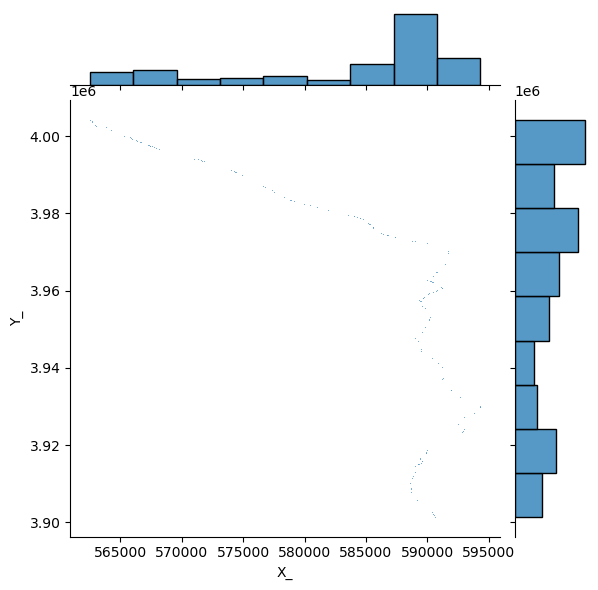

In [62]:
sns.jointplot(x='X_', y='Y_', data=Acc_data, s=0.5);
#contextily.add_basemap(joint_axes.ax_joint,crs=geo_data.crs.to_string(),source=contextily.providers.CartoDB.PositronNoLabels)

In [63]:
Acc_data[['X_', 'Y_']].values

array([[ 562530.3841, 4004186.0758],
       [ 562684.6853, 4003848.8579],
       [ 562715.9041, 4003634.1523],
       [ 562946.3556, 4002827.7558],
       [ 563062.401 , 4002766.7305],
       [ 563882.0369, 4002348.5041],
       [ 564233.7286, 4001680.7255],
       [ 565331.2788, 4000128.8828],
       [ 565759.1708, 3999694.4768],
       [ 565843.1046, 3999588.4867],
       [ 565970.94  , 3999402.08  ],
       [ 566295.9536, 3998946.0816],
       [ 566359.2577, 3998856.7717],
       [ 566625.6318, 3998521.2133],
       [ 566723.5796, 3998395.3193],
       [ 567241.6349, 3997795.0471],
       [ 567310.6079, 3997700.674 ],
       [ 567401.1899, 3997592.2941],
       [ 567419.2857, 3997579.8003],
       [ 567458.6818, 3997528.3384],
       [ 567593.8788, 3997373.1608],
       [ 567732.4282, 3997205.378 ],
       [ 567929.4962, 3996971.8037],
       [ 568144.1997, 3996722.3484],
       [ 571024.9928, 3994232.8702],
       [ 571359.1067, 3994006.2313],
       [ 571598.6538, 3993748.2425],
 

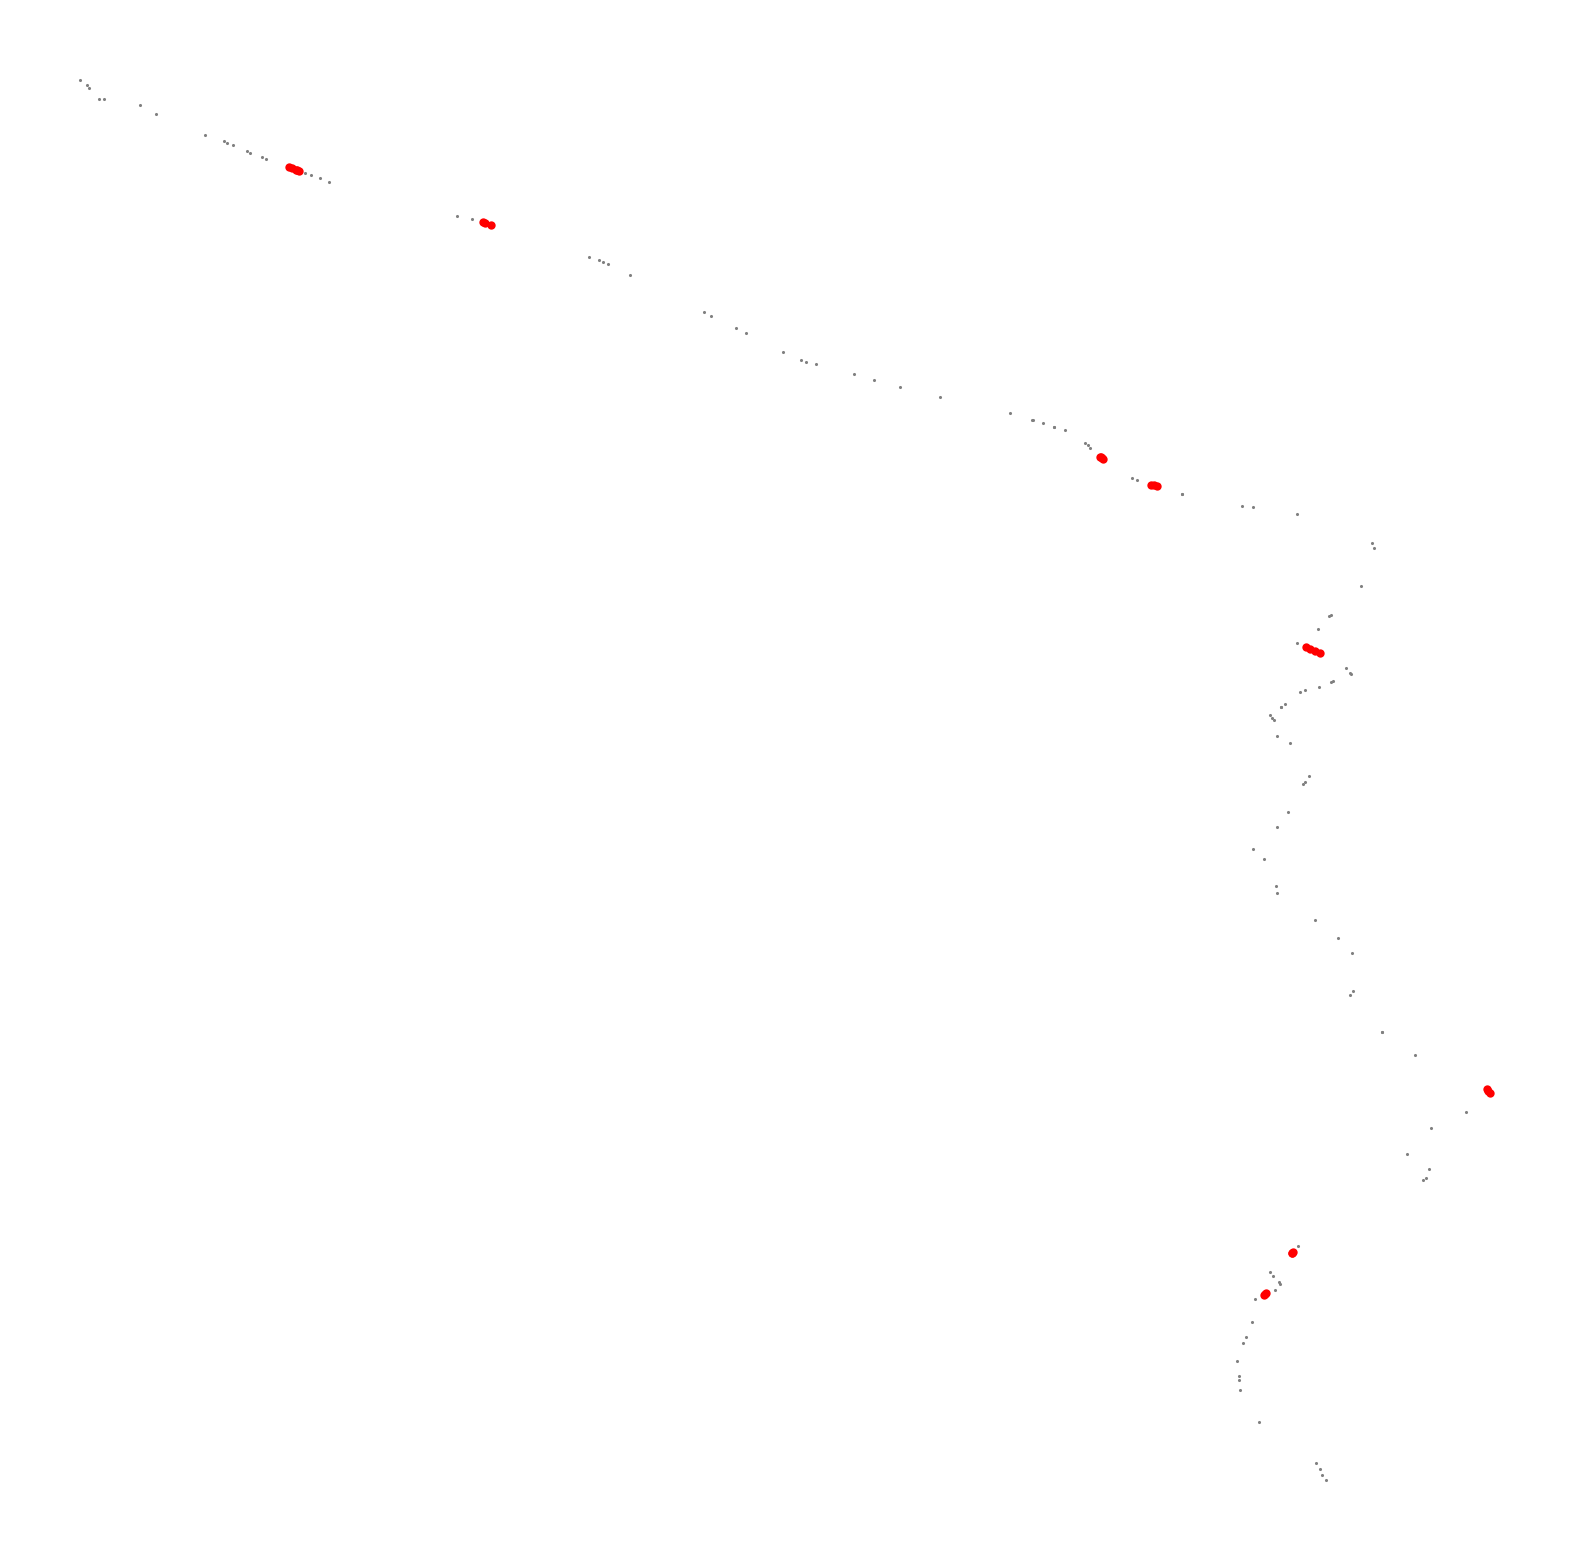

In [64]:
# Run DBSCAN
clusterer = DBSCAN(eps=200, min_samples=3)
clusterer.fit(Acc_data[['X_', 'Y_']].values)
# Turn labels into a Series
lbls = pd.Series(clusterer.labels_, index=Acc_data.index)
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(20, 20))
# Subset points that are not part of any cluster (noise)
noise = Acc_data.loc[lbls==-1, ['X_', 'Y_']]
# Plot noise in grey
ax.scatter(noise['X_'], noise['Y_'], c='grey', s=5, linewidth=0)
# Plot all points that are not noise in red
# NOTE how this is done through some fancy indexing, where
#      we take the index of all points (db) and substract from
#      it the index of those that are noise
ax.scatter(
    Acc_data.loc[Acc_data.index.difference(noise.index), 'X_'],
    Acc_data.loc[Acc_data.index.difference(noise.index), 'Y_'],
    c='red', 
    linewidth=0)

# Add basemap
#contextily.add_basemap(ax,source=contextily.providers.CartoDB.Positron)
    
# Remove axes
ax.set_axis_off()
# Display the figure
plt.show()

In [ ]:
data = np.array([[-37.530, 3.109, -16.452],
                [40.247, 5.483, -15.209],
                [-31.920, 12.584, -12.916],
                [-32.760, 14.072, -13.749],
                [-37.100, 1.953, -15.720],
                [-32.143, 12.990, -13.488],
                [-41.077, 4.651, -15.651], 
                [-34.219, 13.611, -13.090],
                [-33.117, 15.875, -13.738]])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:,0], data[:,1], data[:,2], s=300)
ax.view_init(azim=200)
plt.show()

model = DBSCAN(eps=2.5, min_samples=2)
model.fit_predict(data)
pred = model.fit_predict(data)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:,0], data[:,1], data[:,2], c=model.labels_, s=300)
ax.view_init(azim=200)
plt.show()

print("number of cluster found: {}".format(len(set(model.labels_))))
print('cluster for each point: ', model.labels_)

In [37]:
data_lables = pd.Series([1000], index=[1000])
data_lables

1000    1000
dtype: int64

In [38]:
kms_per_radian = 6371.0088
epsilon = 0.25 / kms_per_radian

for i in range(60):
    df = data.loc[data["Seg_name"] == i]
    if len(df)>2:
        clusterer = DBSCAN(eps=epsilon, min_samples=3, algorithm='ball_tree', metric='haversine').fit(np.radians(df[['Long_', 'Lat']]))
        lbls = pd.Series(clusterer.labels_, index=df.index)
        data_lables = data_lables.append(lbls)

In [342]:
#
index_list = []
max_dist = []
Acc_data = Acc_data[Acc_data["Labels_200"] != -1]
for name, group in Acc_data.groupby(["Labels_200"]):
    max_dist.append(group["geometry"].apply(lambda point: group["geometry"].distance(point)).max())
    index_list.append(name)

C:\Users\sohra\AppData\Local\Temp\ipykernel_584\3838199788.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in Acc_data.groupby(["Labels_200"]):
